<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [44]:
import json
import pandas as pd
from operator import itemgetter
from glob import glob
from os.path import basename, exists
from glob import glob
from lxml import etree, objectify
# import xmltodict
from tqdm import tqdm_notebook as tqdm
from enum import Enum
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import copy
import gzip
import json
# data_dir = "D:/USERS/rbarman/Documents/data/CV1939-45/"
# json_dir = "D:/USERS/rbarman/Documents/data/ocr_inha/"
# folder_prefix = "B751025206"
xml_dir = 'ocr_alto/'

In [50]:
df = pd.read_excel('repertoires.xlsx')
df.dropna(subset=['nom_court'], inplace=True)
df['ids'] = df['lien_source'].str.replace('https://gallica.bnf.fr/ark:/12148/', '')
df.head()

,nom_court,annee,remarques,lien_source,source_ID,vue_debut,page_debut,vue_fin,page_fin,page_total,pages,nom_fichier,ids
0,Annuaire-general-du-commerce,1839.0,NaN,https://gallica.bnf.fr/ark:/12148/bpt6k63243601,FRBNF32698036,123.0,103.0,399.0,379,1457,277.0,bpt6k63243601.Alto.html,bpt6k63243601
1,Annuaire-general-du-commerce,1841.0,"document en 2 parties sur Gallica, seule la pr...",https://gallica.bnf.fr/ark:/12148/bpt6k62931221,FRBNF32698036,151.0,72.0,423.0,344,938,273.0,bpt6k62931221.Alto.html,bpt6k62931221
2,Annuaire-general-du-commerce,1842.0,"document en 2 parties sur Gallica, seule la pr...",https://gallica.bnf.fr/ark:/12148/bpt6k6286466w,FRBNF32698036,189.0,91.0,489.0,391,939,301.0,bpt6k6286466w.Alto.html,bpt6k6286466w
3,Annuaire-general-du-commerce,1843.0,"document en 2 parties sur Gallica, seule la pr...",https://gallica.bnf.fr/ark:/12148/bpt6k6393838j,FRBNF32698036,219.0,107.0,482.0,378,969,264.0,bpt6k6393838j.Alto.html,bpt6k6393838j
4,Annuaire-general-du-commerce,1844.0,La dernière page comprend le début d'une autre...,https://gallica.bnf.fr/ark:/12148/bpt6k6331310g,FRBNF32698036,216.0,103.0,483.0,372,977,268.0,bpt6k6331310g.Alto.html,bpt6k6331310g


In [ ]:
for id in tqdm(df['ids'].values):
    files = glob(xml_dir + id + '*.xml')
    pages = []
    for file in tqdm(files, leave=False):
        page = []
        pages.append(page)
        
        with open(file, 'rb') as infile:
            try:
                xml = etree.parse(infile).getroot()
            except:
                print("Could not read", file)
        for elem in xml.getiterator():
            if not hasattr(elem.tag, 'find'): continue  # (1)
            i = elem.tag.find('}')
            if i >= 0:
                elem.tag = elem.tag[i+1:]
        objectify.deannotate(xml, cleanup_namespaces=True)
        
        printspace = xml.find('.//PrintSpace')
        if printspace is None:
            continue
        for textblock in printspace.findall('.//TextBlock'):
            tb = []
            page.append(tb)
            for line in textblock:
                l = []
                tb.append(l)
                if line.tag != 'TextLine':
                    continue
                for element in line:
                    if element.tag != 'String':
                        continue
                    attribs = element.attrib
                    word_dict = {}
                    word_dict['text'] = attribs['CONTENT']
                    word_dict['confidence'] = attribs['WC']
                    if 'SUBS_CONTENT' in attribs:
                        word_dict['is_hypen'] = True
                        word_dict['full_text'] = attribs['SUBS_CONTENT']
                    tb[-1].append(word_dict)
    with open(xml_dir + id + '_alto.json', 'w', encoding='utf-8') as outfile:
        json.dump(pages, outfile)

In [76]:
file = xml_dir + "bpt6k9780089g_998_alto.xml"

with open(file, 'rb') as infile:
    try:
        xml = etree.parse(infile).getroot()
    except:
        print("Could not read", file)

Could not read ocr_alto/bpt6k9780089g_998_alto.xml


In [82]:
files = glob(xml_dir + '*.xml')
for file in tqdm(files):
    with open(file, 'r', encoding='ISO-8859-1') as infile:
        x = infile.read()
    with open(file, 'w', encoding='ISO-8859-1') as outfile:
        outfile.write(x.replace('utf-8', 'ISO-8859-1'))

In [65]:
for elem in xml.getiterator():
    if not hasattr(elem.tag, 'find'): continue  # (1)
    i = elem.tag.find('}')
    if i >= 0:
        elem.tag = elem.tag[i+1:]
objectify.deannotate(xml, cleanup_namespaces=True)

In [68]:
printspace = xml.find('.//PrintSpace')
pages = []
pages.append([])
for textblock in printspace.findall('.//TextBlock'):
    tb = []
    pages[-1].append(tb)
    for line in textblock:
        l = []
        tb.append(l)
        if line.tag != 'TextLine':
            continue
        for element in line:
            if element.tag != 'String':
                continue
            attribs = element.attrib
            word_dict = {}
            word_dict['text'] = attribs['CONTENT']
            word_dict['confidence'] = attribs['WC']
            if 'SUBS_CONTENT' in attribs:
                word_dict['is_hypen'] = True
                word_dict['full_text'] = attribs['SUBS_CONTENT']
            tb[-1].append(word_dict)

In [69]:
pages

[[[[{'text': 'Nationale', 'confidence': '0.99'},
    {'text': '{<tt),', 'confidence': '0.77'},
    {'text': 'Jean', 'confidence': '1'},
    {'text': 'Fabre.', 'confidence': '1'},
    {'text': 'camionnage.', 'confidence': '0.96'}],
   [{'text': 'déménagements', 'confidence': '0.99'},
    {'text': 'et', 'confidence': '1'},
    {'text': "tlYUI'PO)'U,", 'confidence': '0.70'},
    {'text': 'r.', 'confidence': '1'},
    {'text': 'Vincent*', 'confidence': '0.90'}],
   [{'text': 'Compoint,', 'confidence': '1'},
    {'text': '27.', 'confidence': '1'},
    {'text': '(fi");', 'confidence': '0.83'},
    {'text': 'dépôt', 'confidence': '1'},
    {'text': ':', 'confidence': '1'},
    {'text': 'r.', 'confidence': '1'},
    {'text': 'Montealm,', 'confidence': '0.99'}],
   [{'text': '48.', 'confidence': '0.93'},
    {'text': '(IS.).', 'confidence': '0.88'},
    {'text': 'Marc.', 'confidence': '1'},
    {'text': '09.70.', 'confidence': '0.99'}]],
  [[{'text': 'Nationale', 'confidence': '1'},
    {'text'

In [408]:
def contains_coords(alto):
    return 'HPOS' in alto and 'VPOS' in alto and 'WIDTH' in alto and 'HEIGHT' in alto

def alto2coords(alto, scaling_ratio=1, offset=0):
    x = int(alto['HPOS'])-offset
    y = int(alto['VPOS'])
    w = int(alto['WIDTH'])
    h = int(alto['HEIGHT'])
    return (np.array((x,y,w,h))*scaling_ratio).astype(int)

def parse_xml(idx, file_idx, image=None, right=False):
    cote = idx2cote[idx]
    files = glob(data_dir + folder_prefix + cote + '/*.xml')
    if file_idx >= len(files):
        print("Wrong file_idx", idx, file_idx, cote)
        return
    file = files[file_idx]
    with open(file, 'rb') as infile:
        try:
            xml = etree.parse(infile).getroot()
        except:
            print("Could not read", file)
            return
    for elem in xml.getiterator():
        if not hasattr(elem.tag, 'find'): continue  # (1)
        i = elem.tag.find('}')
        if i >= 0:
            elem.tag = elem.tag[i+1:]
    objectify.deannotate(xml, cleanup_namespaces=True)

    page_dict = {}
    
    page_dict['styles'] = [dict(x.attrib) for x in xml.findall('.//TextStyle')]
    
    page = xml.find('.//Page')
    printspace = xml.find('.//PrintSpace')
    if page is None or printspace is None:
        return
    if 'HEIGHT' in page.attrib and 'WIDTH' in page.attrib:
        page_dict['dimensions'] = (int(page.attrib['WIDTH']), int(page.attrib['HEIGHT']))
    elif ('HEIGHT' in printspace.attrib and 'WIDTH' in printspace.attrib
          and 'VPOS' in printspace.attrib and printspace.attrib['VPOS'] == '0'
          and 'HPOS' in printspace.attrib and printspace.attrib['VPOS'] == '0'):
        page_dict['dimensions'] = (int(printspace.attrib['WIDTH']), int(printspace.attrib['HEIGHT']))
    else:
        print("Did not find dimensions")
        print(file)
        return
    
    offset = 0
    scaling_ratio = 1
    if image is not None:
        ocr_width, ocr_height = page_dict['dimensions']
        img_height, img_width, _ = image.shape
        scaling_ratio = img_height/ocr_height
        if right:
            offset = img_width
    
    page_dict['textblocks'] = []
    textblocks = page_dict['textblocks']
    for textblock in printspace.findall('.//TextBlock'):
        attrib = dict(textblock.attrib)
        if not scale_offset(attrib, scaling_ratio, img_width, offset):
            continue
        textblocks.append(attrib)
        textblocks[-1]['CONTENT'] = []
        textlines = textblocks[-1]['CONTENT']
        for item in textblock:
            attrib = dict(item.attrib)
            if not scale_offset(attrib, scaling_ratio, img_width, offset):
                continue
            textlines.append(attrib)
            textlines[-1]['CONTENT'] = []
            for item2 in item:
                attrib = dict(item2.attrib)
                if not scale_offset(attrib, scaling_ratio, img_width, offset):
                    continue
                textlines[-1]['CONTENT'].append(attrib)
                textlines[-1]['CONTENT'][-1]['TYPE'] = item2.tag
    return page_dict

def scale_offset(attributes, scaling_ratio, img_width = 1e10, offset=0):
    if 'HEIGHT' in attributes:
        attributes['HEIGHT'] = int(int(attributes['HEIGHT'])*scaling_ratio)
    if 'WIDTH' in attributes:
        attributes['WIDTH'] = int(int(attributes['WIDTH'])*scaling_ratio)
    if 'VPOS' in attributes:
        attributes['VPOS'] = int(int(attributes['VPOS'])*scaling_ratio)
    if 'HPOS' in attributes:
        attributes['HPOS'] = int(int(attributes['HPOS'])*scaling_ratio)
        attributes['HPOS'] -= offset
        if attributes['HPOS'] < 0 or attributes['HPOS'] > img_width:
            return False
    return True

In [383]:
idx2cote

In [410]:
for image_file in tqdm(image_files):
    file_basename = basename(image_file)
    name_split = file_basename.replace('.jpg', '').split('_')

    idx = int(name_split[0])
    offset = 0
    right = 'r' in name_split[1]
    idx_file = int(name_split[1].rstrip('rl'))
    
    if exists(json_dir + file_basename.replace('.jpg', '_ocr.json.gz')):
        continue
    image = np.array(Image.open(image_file))
    img_height, img_width, _ = image.shape
    
    page_dict = parse_xml(idx, idx_file, image, right=right)
    if page_dict is None:
#         print("Failure with", file_basename)
        continue
    page_dict['image_name'] = file_basename
    
    json_str = json.dumps(page_dict) + "\n"
    json_bytes = json_str.encode('utf-8') 
    
    with gzip.GzipFile(json_dir + file_basename.replace('.jpg', '_ocr.json.gz'), 'w') as outfile:
        outfile.write(json_bytes)

Wrong file_idx 2088 14 CVP00191_19411031
Wrong file_idx 2088 15 CVP00191_19411031
Wrong file_idx 2088 16 CVP00191_19411031
Could not read D:/USERS/rbarman/Documents/data/CV1939-45/B751025206CVP00789_19430118\B751025206CVP00789_19430118_012.xml
Could not read D:/USERS/rbarman/Documents/data/CV1939-45/B751025206CVP00807_19430129\B751025206CVP00807_19430129_050.xml
Could not read D:/USERS/rbarman/Documents/data/CV1939-45/B751025206CVP00811_19430201\B751025206CVP00811_19430201_005.xml
Could not read D:/USERS/rbarman/Documents/data/CV1939-45/B751025206CVP00832_19430210\B751025206CVP00832_19430210_036.xml
Could not read D:/USERS/rbarman/Documents/data/CV1939-45/B751025206CVP00871_19430301\B751025206CVP00871_19430301_022.xml
Could not read D:/USERS/rbarman/Documents/data/CV1939-45/B751025206CVP00879_19430304\B751025206CVP00879_19430304_001.xml
Could not read D:/USERS/rbarman/Documents/data/CV1939-45/B751025206CVP00982_19430429\B751025206CVP00982_19430429_010.xml
Could not read D:/USERS/rbarma

In [381]:
for file in glob(json_dir + '*.json'):
    print(file)

D:/USERS/rbarman/Documents/data/ocr_inha\001787_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000001l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000001r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000002l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000002r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000003l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000003r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000004l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000004r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000005l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000005r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000006l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000006r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000007l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001787_000007r_ocr.json
D:/USERS/rbarman/Documents

D:/USERS/rbarman/Documents/data/ocr_inha\001835_000001l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000001r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000002l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000002r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000003l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000003r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000004l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000004r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000005l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000005r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000006l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000006r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000007l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000007r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001835_000008l_ocr.json
D:/USERS/rbarman/Document

D:/USERS/rbarman/Documents/data/ocr_inha\001887_000006r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000007l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000007r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000008l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000008r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000009l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000009r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000010l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000010r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000011l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000011r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000012l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001887_000012r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001888_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001888_000001l_ocr.json
D:/USERS/rbarman/Documents

D:/USERS/rbarman/Documents/data/ocr_inha\001895_000050l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001895_000050r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001895_000051_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000001l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000001r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000002l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000002r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000003l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000003r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000004l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000004r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000005l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000005r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001896_000006l_ocr.json
D:/USERS/rbarman/Documents/

D:/USERS/rbarman/Documents/data/ocr_inha\001904_000131_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000132_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000133_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000134_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000135_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000136_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000137_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000138_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000139_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000140_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000141_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000142_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000143_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000144_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001904_000145_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\001911_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001911_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\001921_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001921_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001922_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001922_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\001934_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001934_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001935_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\001948_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001948_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001948_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001948_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001948_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001948_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001948_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001948_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001949_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001949_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001949_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001949_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001949_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001949_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001949_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\001959_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001959_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\001972_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001972_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001972_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000034_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000035_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000036_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000037_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000038_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000039_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000040_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000041_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000042_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000043_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000044_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001973_000045_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\001987_000040_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000041_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000042_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000043_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000044_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000045_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000046_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000047_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000048_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000049_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000050_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000051_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000052_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000053_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001987_000054_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\001995_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\001995_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002012_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002012_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002024_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002024_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002036_000029_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002036_000030_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002036_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002037_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002053_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002053_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002053_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002053_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002054_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002054_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002054_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002054_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002054_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002054_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002054_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002054_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002054_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002054_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002054_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002062_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002062_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002078_000036_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000037_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000038_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000039_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000040_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000041_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000042_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000043_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000044_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000045_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000046_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000047_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000048_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000049_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002078_000050_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002091_000051_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000052_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000053_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000054_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000055_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000056_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000057_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000058_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000059_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000060_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000061_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000062_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000063_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000064_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002091_000065_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002103_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002103_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002103_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002103_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002103_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002103_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002103_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002103_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002103_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002103_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002103_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002104_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002104_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002104_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002104_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002117_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000029_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000030_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000032_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000033_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000034_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000035_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000036_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002117_000037_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002127_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000029_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000030_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000032_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000033_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000034_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000035_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000036_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000037_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000038_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002127_000039_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002158_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002158_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002172_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002172_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002172_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002172_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002172_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002172_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002172_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002172_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002172_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002172_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002172_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002173_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002173_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002173_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002173_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002235_000039_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000040_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000041_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000042_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000043_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000044_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000045_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000046_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000047_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000048_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000049_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000050_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000051_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000052_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002235_000053_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002248_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002248_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002294_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002294_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002307_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002307_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002307_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002307_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002307_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002307_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002307_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002307_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002308_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002308_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002308_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002308_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002308_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002308_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002308_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002354_000051_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000052_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000053_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000054_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000055_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000056_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000057_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000058_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000059_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000060_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000061_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000062_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000063_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000064_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002354_000065_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002364_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002364_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002364_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002365_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002404_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000029_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000030_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000032_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000033_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000034_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000035_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000036_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000037_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000038_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000039_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002404_000040_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002414_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000029_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000030_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000032_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000033_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000034_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000035_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000036_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000037_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002414_000038_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002454_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002454_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002454_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002454_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002454_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002455_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002455_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002455_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002455_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002455_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002455_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002455_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002455_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002455_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002455_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002465_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002465_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002465_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002465_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002465_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002465_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002465_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002465_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002465_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002465_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002465_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002465_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002466_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002466_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002466_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002512_000045_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000046_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000047_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000048_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000049_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000050_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000051_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000052_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000053_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000054_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000055_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000056_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000057_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000058_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002512_000059_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002522_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002522_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002554_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002554_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002566_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002566_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002566_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002566_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002566_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002566_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002566_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002566_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002567_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002567_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002567_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002567_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002567_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002567_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002567_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002592_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002592_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002592_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002592_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002592_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002593_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002593_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002593_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002593_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002593_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002593_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002593_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002593_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002593_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002593_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002607_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002607_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002608_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002632_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002633_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002647_000045_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002647_000046_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002647_000047_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002647_000048_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002647_000049_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002647_000050_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002647_000051_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002648_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002648_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002648_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002648_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002648_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002648_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002648_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002648_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002707_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002707_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002707_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002707_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002707_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002707_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002707_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002708_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002708_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002708_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002708_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002708_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002708_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002708_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002708_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002722_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002722_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002759_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002759_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002759_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002759_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002759_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002760_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002760_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002760_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002760_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002760_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002760_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002760_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002760_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002760_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002760_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002773_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002773_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002805_000090_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000091_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000092_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000093_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000094_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000095_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000097_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000098_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000099_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000100_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000101_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000102_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002805_000103_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002806_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002806_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002818_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002818_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002818_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002818_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002818_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002818_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002819_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002819_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002819_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002819_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002819_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002819_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002819_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002819_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002819_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002831_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002831_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002831_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002831_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002831_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002831_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002831_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002831_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002831_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002831_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002831_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002831_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002832_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002832_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002832_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002884_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002884_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002897_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002897_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002928_000047_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000048_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000049_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000050_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000051_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000052_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000053_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000054_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000055_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000056_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000057_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000058_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000059_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000060_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002928_000061_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002937_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002937_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002937_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002937_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002937_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002937_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002938_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002938_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002938_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002938_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002938_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002938_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002938_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002938_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002938_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002961_000030_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000032_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000033_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000034_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000035_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000036_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000037_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000038_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000039_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000040_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000041_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000042_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000043_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002961_000044_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\002973_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\002973_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003006_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000029_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000030_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003006_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003014_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003014_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003043_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003043_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003055_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003056_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003058_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003058_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003081_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003081_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003096_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003096_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003125_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003126_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003134_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003134_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003134_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003134_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003135_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003135_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003135_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003135_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003135_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003135_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003136_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003136_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003136_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003136_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003136_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003169_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003169_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003171_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003184_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003184_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003184_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003184_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003184_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003184_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003184_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003184_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003184_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003184_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003186_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003186_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003186_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003186_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003186_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003217_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003217_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003224_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000029_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000030_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000032_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000033_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000034_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000035_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000036_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003224_000037_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003261_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003261_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003261_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003261_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003261_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003261_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003261_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003261_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003262_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003262_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003262_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003262_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003262_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003262_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003262_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003279_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003279_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003335_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003335_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003336_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003336_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003337_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003337_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003337_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003337_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003337_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003337_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003337_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003338_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003338_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003338_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003338_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003360_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003360_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003360_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003360_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003360_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003360_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003361_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003361_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003361_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003361_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003361_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003361_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003361_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003361_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003362_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003419_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003419_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003419_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003419_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003419_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003419_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003420_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003420_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003420_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003420_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003420_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003420_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003420_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003420_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003420_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003437_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003437_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003473_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003473_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003473_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003473_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003473_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003473_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003473_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003473_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003473_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003473_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003473_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003474_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003474_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003474_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003474_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003487_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003488_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003488_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003488_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003488_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003488_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003488_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003488_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003488_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003491_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003491_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003491_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003491_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003491_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003491_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003528_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003528_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003540_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000029_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000030_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000032_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003540_000033_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003552_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003552_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003552_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003553_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003599_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003599_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003599_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003601_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003601_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003601_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003601_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003601_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003601_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003601_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003601_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003602_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003602_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003602_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003602_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003613_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003614_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003615_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003615_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003615_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003615_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003615_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003615_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003615_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003615_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003615_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003615_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003616_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003616_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003616_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003647_000039_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000040_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000041_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000042_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000043_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000044_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000045_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000046_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000047_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000048_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000049_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000050_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000051_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000052_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003647_000053_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003657_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003657_000032_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000010_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000011_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003658_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003690_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003690_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003690_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003690_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003690_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003692_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003692_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003692_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003692_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003692_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003692_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003692_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003692_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003692_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003692_000009_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003707_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000018_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003707_000029_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003732_000012_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003732_000013_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003732_000014_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003732_000015_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003732_000016_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003732_000017_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003733_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003733_000001_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003733_000002_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003733_000003_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003733_000004_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003733_000005_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003733_000006_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003733_000007_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003733_000008_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\003743_000058_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000059_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000060_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000061_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000062_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000063_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000064_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000065_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000066_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000067_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000068_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000069_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000070_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000071_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\003743_000072_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\004285_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000029_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000030_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000032_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000033_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000034_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\004285_000035_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

D:/USERS/rbarman/Documents/data/ocr_inha\005102_000005r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005102_000006l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005102_000006r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005102_000007l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005102_000007r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005102_000008l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005102_000008r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005104_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005104_000001l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005104_000001r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005104_000002l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005104_000002r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005104_000003l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005104_000003r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005104_000004l_ocr.json
D:/USERS/rbarman/Documents

D:/USERS/rbarman/Documents/data/ocr_inha\005160_000006l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005160_000006r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005160_000007l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005160_000007r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005164_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005164_000001l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005164_000001r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005164_000002l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005164_000002r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005164_000003l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005164_000003r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005164_000004l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005164_000004r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005164_000005l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005164_000005r_ocr.json
D:/USERS/rbarman/Documents

D:/USERS/rbarman/Documents/data/ocr_inha\005174_000016r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000017l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000017r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000018l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000018r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000019l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000019r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000020l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000020r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000021l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000021r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000022l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000022r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000023l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005174_000023r_ocr.json
D:/USERS/rbarman/Document

D:/USERS/rbarman/Documents/data/ocr_inha\005221_000009r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000010l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000010r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000011l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000011r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000012l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000012r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000013l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000013r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000014l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000014r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000015l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005221_000015r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005224_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005228_000000_ocr.json
D:/USERS/rbarman/Documents/

D:/USERS/rbarman/Documents/data/ocr_inha\005236_000003r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000004l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000004r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000005l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000005r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000006l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000006r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000007l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000007r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000008l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000008r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000009l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000009r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000010l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005236_000010r_ocr.json
D:/USERS/rbarman/Document

D:/USERS/rbarman/Documents/data/ocr_inha\005297_000015l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005297_000015r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000001l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000001r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000002l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000002r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000003l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000003r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000004l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000004r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000005l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000005r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000006l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005299_000006r_ocr.json
D:/USERS/rbarman/Documents

D:/USERS/rbarman/Documents/data/ocr_inha\005324_000014r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000015l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000015r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000016l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000016r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000017l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000017r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000018l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000018r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000019l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000019r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000020l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000020r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000021l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005324_000021r_ocr.json
D:/USERS/rbarman/Document

D:/USERS/rbarman/Documents/data/ocr_inha\005378_000013l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005378_000013r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005378_000014l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005378_000014r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005378_000015l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005378_000015r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005380_000000l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005380_000000r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005386_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005386_000001l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005386_000001r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005386_000002l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005386_000002r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005386_000003l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005386_000003r_ocr.json
D:/USERS/rbarman/Documents

D:/USERS/rbarman/Documents/data/ocr_inha\005398_000033r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000034l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000034r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000035l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000035r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000036l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000036r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000037l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000037r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000038l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000038r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000039l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000039r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000040l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005398_000040r_ocr.json
D:/USERS/rbarman/Document

D:/USERS/rbarman/Documents/data/ocr_inha\005432_000015l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005432_000015r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005432_000016l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005432_000016r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005432_000017l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005432_000017r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005433_000000_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005433_000001l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005433_000001r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005433_000002l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005433_000002r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005433_000003l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005433_000003r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005433_000004l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005433_000004r_ocr.json
D:/USERS/rbarman/Documents

D:/USERS/rbarman/Documents/data/ocr_inha\005456_000004r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000005l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000005r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000006l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000006r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000007l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000007r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000008l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000008r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000009l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000009r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000010l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000010r_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000011l_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005456_000011r_ocr.json
D:/USERS/rbarman/Document

D:/USERS/rbarman/Documents/data/ocr_inha\005519_000019_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000020_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000021_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000022_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000023_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000024_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000025_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000026_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000027_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000028_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000029_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000030_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000031_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000032_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha\005519_000033_ocr.json
D:/USERS/rbarman/Documents/data/ocr_inha

In [407]:
image_file = image_files[1296]
image_file = "D:/USERS/rbarman/Documents/Notebooks/drouot_39-45/all_valid\\001827_000005l.jpg"
file_basename = basename(image_file)
name_split = file_basename.replace('.jpg', '').split('_')
image = np.array(Image.open(image_file))
img_height, img_width, _ = image.shape
idx = int(name_split[0])
offset = 0
right = 'r' in name_split[1]
idx_file = int(name_split[1].rstrip('rl'))

page_dict = parse_xml(idx, idx_file, image, right=right)
if page_dict is None:
    print("Failure with", file_basename)
page_dict['image_name'] = file_basename
page_dict

171 957 0.49983338887037654
343 957 0.49983338887037654
343 957 0.49983338887037654
410 957 0.49983338887037654
427 957 0.49983338887037654
470 957 0.49983338887037654
493 957 0.49983338887037654
605 957 0.49983338887037654
616 957 0.49983338887037654
174 957 0.49983338887037654
174 957 0.49983338887037654
212 957 0.49983338887037654
230 957 0.49983338887037654
263 957 0.49983338887037654
282 957 0.49983338887037654
352 957 0.49983338887037654
366 957 0.49983338887037654
394 957 0.49983338887037654
410 957 0.49983338887037654
280 957 0.49983338887037654
280 957 0.49983338887037654
225 957 0.49983338887037654
225 957 0.49983338887037654
253 957 0.49983338887037654
267 957 0.49983338887037654
363 957 0.49983338887037654
384 957 0.49983338887037654
459 957 0.49983338887037654
474 957 0.49983338887037654
592 957 0.49983338887037654
606 957 0.49983338887037654
661 957 0.49983338887037654
667 957 0.49983338887037654
680 957 0.49983338887037654
176 957 0.49983338887037654
176 957 0.4998333888

{'styles': [{'ID': 'font0', 'FONTFAMILY': 'Arial', 'FONTSIZE': '6'},
  {'ID': 'font1', 'FONTFAMILY': 'Arial', 'FONTSIZE': '12'}],
 'dimensions': (3829, 3001),
 'textblocks': [{'ID': 'BlockId-9ACF66DB-CA95-4466-840B-69E902E455CC-',
   'HEIGHT': 573,
   'WIDTH': 591,
   'VPOS': 211,
   'HPOS': 171,
   'STYLEREFS': 'StyleId-91C1915C-4B7A-4620-9C77-0825C965B49E- font1',
   'CONTENT': [{'HEIGHT': 23,
     'WIDTH': 296,
     'VPOS': 214,
     'HPOS': 343,
     'CONTENT': [{'STYLE': 'bold',
       'CONTENT': 'ROPS',
       'HEIGHT': 21,
       'WIDTH': 66,
       'VPOS': 216,
       'HPOS': 343,
       'TYPE': 'String'},
      {'WIDTH': 16, 'VPOS': 216, 'HPOS': 410, 'TYPE': 'SP'},
      {'STYLE': 'bold',
       'CONTENT': '(F.)',
       'HEIGHT': 21,
       'WIDTH': 41,
       'VPOS': 215,
       'HPOS': 427,
       'TYPE': 'String'},
      {'WIDTH': 22, 'VPOS': 215, 'HPOS': 470, 'TYPE': 'SP'},
      {'STYLE': 'bold',
       'CONTENT': '(attribué',
       'HEIGHT': 21,
       'WIDTH': 110,
  

In [411]:
idx2cote[3673]

'CVP01784_19450629'

In [175]:
idx = 1980
file_idx = 5
# idx = 1787
# file_idx = 6
cote = idx2cote[idx]
files = glob(data_dir + folder_prefix + cote + '/*.xml')
file = files[file_idx]
with open(file, 'rb') as infile:
    xml = etree.parse(infile).getroot()

In [176]:
image = np.array(Image.open('D:/USERS/rbarman/Documents/Notebooks/drouot_39-45/all_valid/%06d_%06d.jpg'%(idx,file_idx)))

In [210]:
for elem in xml.getiterator():
    if not hasattr(elem.tag, 'find'): continue  # (1)
    i = elem.tag.find('}')
    if i >= 0:
        elem.tag = elem.tag[i+1:]
objectify.deannotate(xml, cleanup_namespaces=True)

page_dict = {}
page = xml.find('.//Page')
printspace = xml.find('.//PrintSpace')
if 'HEIGHT' in page.attrib and 'WIDTH' in page.attrib:
    page_dict['dimensions'] = (int(page.attrib['WIDTH']), int(page.attrib['HEIGHT']))
elif ('HEIGHT' in printspace.attrib and 'WIDTH' in printspace.attrib
      and 'VPOS' in printspace.attrib and printspace.attrib['VPOS'] == '0'
      and 'HPOS' in printspace.attrib and printspace.attrib['VPOS'] == '0'):
    page_dict['dimensions'] = (int(printspace.attrib['WIDTH']), int(printspace.attrib['HEIGHT']))
else:
    print("Did not find dimensions")
page_dict['textblocks'] = []
textblocks = page_dict['textblocks']
for textblock in printspace.findall('TextBlock'):
    textblocks.append(dict(textblock.attrib))
    textblocks[-1]['CONTENT'] = []
    textlines = textblocks[-1]['CONTENT']
    for item in textblock:
        textlines.append(dict(item.attrib))
        textlines[-1]['CONTENT'] = []
        for item2 in item:
            textlines[-1]['CONTENT'].append(dict(item2.attrib))
            textlines[-1]['CONTENT'][-1]['TYPE'] = item2.tag

In [211]:
page_dict

{'dimensions': (1308, 1618),
 'textblocks': [{'ID': 'PAG_00000006_TB000001',
   'STYLEREFS': 'TXT_4',
   'HEIGHT': '32',
   'WIDTH': '715',
   'HPOS': '229',
   'VPOS': '127',
   'CONTENT': [{'ID': 'PAG_00000006_TL000001',
     'STYLEREFS': 'TXT_1',
     'HEIGHT': '32',
     'WIDTH': '715',
     'HPOS': '229',
     'VPOS': '127',
     'BASELINE': '149',
     'CONTENT': [{'ID': 'PAG_00000006_ST000001',
       'STYLEREFS': 'TXT_1',
       'HEIGHT': '21',
       'WIDTH': '35',
       'HPOS': '229',
       'VPOS': '127',
       'CONTENT': '32.',
       'WC': '0.5',
       'WD': 'false',
       'TYPE': 'String'},
      {'ID': 'PAG_00000006_SP000001',
       'WIDTH': '17',
       'HPOS': '263',
       'VPOS': '127',
       'TYPE': 'SP'},
      {'ID': 'PAG_00000006_ST000002',
       'STYLEREFS': 'TXT_1',
       'HEIGHT': '4',
       'WIDTH': '29',
       'HPOS': '279',
       'VPOS': '139',
       'CONTENT': '—',
       'WC': '0.5',
       'WD': 'true',
       'TYPE': 'String'},
      {'ID': 

In [193]:
ocr_width, ocr_height = page_dict['dimensions']
img_height, img_width, _ = image.shape
scaling_ratio = img_height/ocr_height
scaling_ratio

0.7496909765142151

In [207]:
b_idx = 6
b_x, b_y, b_w, b_h = alto2coords(textblocks[b_idx]['CONTENT'][0], scaling_ratio)
# b_x -= img_width
b_x, b_y, b_w, b_h

(172, 335, 644, 22)

In [293]:
file_basename

['001787', '000006l']

416 0 0
192 0 0
283 0 0
191 0 0
285 0 0
191 0 0
286 0 0
191 0 0
285 0 0
284 0 0
191 0 0
285 0 0
285 0 0
598 0 0
191 0 0
286 0 0
192 0 0
283 0 0
284 0 0
192 0 0
285 0 0
286 0 0
286 0 0
285 0 0
286 0 0
286 0 0
598 0 0
1268 873 0
skipped
1035 873 0
skipped


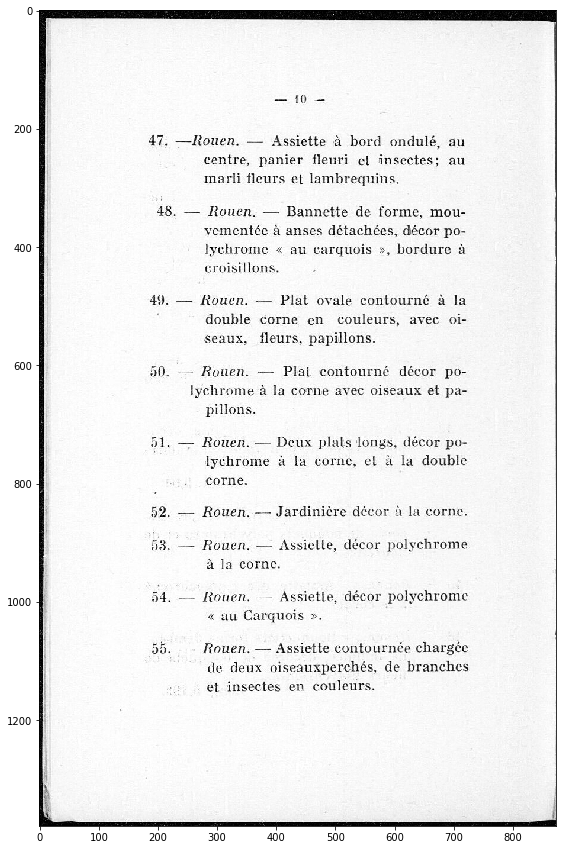

In [294]:
tmp = image.copy()
for block in parse_xml(idx, file_idx, image, right=False)['textblocks']:
    for line in block['CONTENT']:
        for word in line['CONTENT']:
            if word['TYPE'] == 'String':
                b_x, b_y, b_w, b_h = alto2coords(word)
                cv2.rectangle(tmp, (b_x, b_y), (b_x+b_w, b_y+b_h), (255,0,0), 3)
plt.figure(figsize=(15,15))
plt.imshow(tmp);

In [212]:
image_files = glob('D:/USERS/rbarman/Documents/Notebooks/drouot_39-45/all_valid/*.jpg')

-464 876 876
skipped
-689 876 876
skipped
1266 876 0
1041 876 0
1135 876 0
1039 876 0
1133 876 0
1132 876 0
1420 876 0
1125 876 0
1132 876 0
1132 876 0
1132 876 0
1125 876 0
1131 876 0
1131 876 0
1050 876 0
1130 876 0
1131 876 0
1418 876 0
1036 876 0
1129 876 0
1129 876 0
1035 876 0
1129 876 0
1035 876 0
1128 876 0
1128 876 0
1403 876 0


['001787', '000005r']

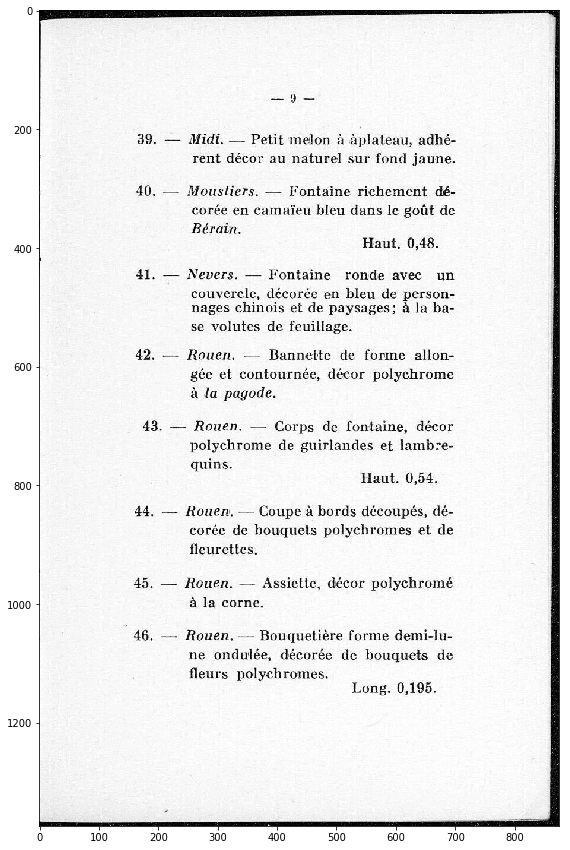

In [297]:
image_file = image_files[10]

file_basename = basename(image_file).replace('.jpg', '').split('_')
image = np.array(Image.open(image_file))
img_height, img_width, _ = image.shape
idx = int(file_basename[0])
offset = 0
right = 'r' in file_basename[1]
idx_file = int(file_basename[1].rstrip('rl'))

tmp = image.copy()
for block in parse_xml(idx, file_idx, image, right=right)['textblocks']:
    for line in block['CONTENT']:
        for word in line['CONTENT']:
            if word['TYPE'] == 'String':
                b_x, b_y, b_w, b_h = alto2coords(word)
                cv2.rectangle(tmp, (b_x, b_y), (b_x+b_w, b_y+b_h), (255,0,0), 3)
plt.figure(figsize=(15,15))
plt.imshow(tmp);

In [103]:
drouot_idxs = df[df.creator.notnull()][df[df.creator.notnull()].creator.apply(lambda x: 'Drouot' in x)].index

dates = pd.to_datetime(df[df.date.apply(len) == 3][df[df.date.apply(len) == 3].date.apply(itemgetter(1)).str.startswith("19")].date.apply(itemgetter(1)))
period_idxs = dates[(dates > '1939-01-01') & (dates < '1945-12-31')].index

names = set()
for val in df.loc[period_idxs]['creator'].values:
    if isinstance(val, (list,)):
        for name in val:
            names.add(name)
partition = {'Inconnu': []}
name2roles = {}
for name in list(names):
    split = name.split('>')
    if len(split) == 1:
        name = split[0].strip()
        partition['Inconnu'].append(name)
        if not name in name2roles:
            name2roles[name] = []
        name2roles[name].append('Inconnu')
    elif len(split) == 2:
        name, role = split
        role = role.strip()
        name = name.strip()
        if not role in partition:
            partition[role] = []
        partition[role].append(name.strip())
        if not name in name2roles:
            name2roles[name] = []
        name2roles[name].append(role)
    else:
        print(split)
name2roles = {k: sorted(v) for k,v in name2roles.items()}
df_roles = pd.DataFrame([name2roles]).T.reset_index().rename(columns={0: 'roles', 'index': 'nom'})
df_roles.sort_values(by='roles')[['roles', 'nom']].to_excel('acteurs_catalogues.xlsx', index=False)